## Problem Statement

<p style="color:gold;font-weight:bold;font-size:20px;">Based on the given loan data can we understand the major factors or characteristics of a borrower which makes them to get into delinquent stage.</p>


<p style="color:gold;font-weight:bold;font-size:20px;">- Delinquency is a major metric in assessing risk as more and more customers getting delinquent means the risk of customers that will default will also increase.</p>

<p style="color:gold;font-weight:bold;font-size:20px;">- The main objective is to minimize the risk, for which you need to build a decision tree model using CART technique, that will identify various important risk and non-risk attributes of borrowers that indicate whether they will get into delinquent stage.</p>

## Importing libraries & Loading data

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier#,DecisionTreeRegressor
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
df = pd.read_csv("Loan Delinquent Dataset.csv")

## Basic EDA

In [3]:
df.head()

,ID,delinquent,Sdelinquent,term,gender,purpose,home_ownership,age,FICO
0,1,Yes,1,36 months,Female,House,Mortgage,>25,300-500
1,2,No,0,36 months,Female,House,Rent,20-25,>500
2,3,Yes,1,36 months,Female,House,Rent,>25,300-500
3,4,Yes,1,36 months,Female,Car,Mortgage,>25,300-500
4,5,Yes,1,36 months,Female,House,Rent,>25,300-500


### Dropping unwanted variables

Sdelinquent can also be dropped instead of delinquent.

In [4]:
df=df.drop(["ID","delinquent"],axis=1) 

In [5]:
df.head()

,Sdelinquent,term,gender,purpose,home_ownership,age,FICO
0,1,36 months,Female,House,Mortgage,>25,300-500
1,0,36 months,Female,House,Rent,20-25,>500
2,1,36 months,Female,House,Rent,>25,300-500
3,1,36 months,Female,Car,Mortgage,>25,300-500
4,1,36 months,Female,House,Rent,>25,300-500


In [6]:
df.shape

(11548, 7)

In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sdelinquent     11548 non-null  int64 
 1   term            11548 non-null  object
 2   gender          11548 non-null  object
 3   purpose         11548 non-null  object
 4   home_ownership  11548 non-null  object
 5   age             11548 non-null  object
 6   FICO            11548 non-null  object
dtypes: int64(1), object(6)
memory usage: 631.7+ KB


### Geting unique counts of all Objects

In [8]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(col)
        print('_____')
        print(df[col].value_counts())
        print('\n')

term
_____
36 months    10589
60 months      959
Name: term, dtype: int64


gender
_____
Male      6555
Female    4993
Name: gender, dtype: int64


purpose
_____
House       6892
Car         2080
Other        928
Personal     892
Wedding      408
Medical      266
other         82
Name: purpose, dtype: int64


home_ownership
_____
Mortgage    5461
Rent        5216
Own          871
Name: home_ownership, dtype: int64


age
_____
20-25    5888
>25      5660
Name: age, dtype: int64


FICO
_____
300-500    6370
>500       5178
Name: FICO, dtype: int64




### Note:
Decision tree in Python can take only numerical / categorical colums. It cannot take string / object types. 

The following code loops through each column and checks if the column type is object then converts those columns into categorical with each distinct value becoming a category.

In [9]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: term
['36 months', '60 months']
Categories (2, object): ['36 months', '60 months']
[0 1]


feature: gender
['Female', 'Male']
Categories (2, object): ['Female', 'Male']
[0 1]


feature: purpose
['House', 'Car', 'Other', 'Personal', 'Wedding', 'Medical', 'other']
Categories (7, object): ['Car', 'House', 'Medical', 'Other', 'Personal', 'Wedding', 'other']
[1 0 3 4 5 2 6]


feature: home_ownership
['Mortgage', 'Rent', 'Own']
Categories (3, object): ['Mortgage', 'Own', 'Rent']
[0 2 1]


feature: age
['>25', '20-25']
Categories (2, object): ['20-25', '>25']
[1 0]


feature: FICO
['300-500', '>500']
Categories (2, object): ['300-500', '>500']
[0 1]


For each feature, look at the 2nd and 4th row to get the encoding mappings. Ignore the line starting with 'Categories'

In [10]:
df.dtypes

Sdelinquent       int64
term               int8
gender             int8
purpose            int8
home_ownership     int8
age                int8
FICO               int8
dtype: object

#### Comparing the unique counts from above

In [11]:
for col in df.columns:
    print(col)
    print('_____')
    print(df[col].value_counts())
    print('\n')


Sdelinquent
_____
1    7721
0    3827
Name: Sdelinquent, dtype: int64


term
_____
0    10589
1      959
Name: term, dtype: int64


gender
_____
1    6555
0    4993
Name: gender, dtype: int64


purpose
_____
1    6892
0    2080
3     928
4     892
5     408
2     266
6      82
Name: purpose, dtype: int64


home_ownership
_____
0    5461
2    5216
1     871
Name: home_ownership, dtype: int64


age
_____
0    5888
1    5660
Name: age, dtype: int64


FICO
_____
0    6370
1    5178
Name: FICO, dtype: int64




In [12]:
df.head()

,Sdelinquent,term,gender,purpose,home_ownership,age,FICO
0,1,0,0,1,0,1,0
1,0,0,0,1,2,0,1
2,1,0,0,1,2,1,0
3,1,0,0,0,0,1,0
4,1,0,0,1,2,1,0


Label Encoding has been done and all columns are converted to numbers

### Proportion of Target Variable Category Levels

In [13]:
df.Sdelinquent.value_counts(normalize=True).round(2)*100

1    67.0
0    33.0
Name: Sdelinquent, dtype: float64

## Separate Target Feature & Independent Features

In [14]:
# this is a requirement of sklearn models to have Xs and Y in separate variables
X = df.drop("Sdelinquent", axis=1)
y = df['Sdelinquent']

X.head()

,term,gender,purpose,home_ownership,age,FICO
0,0,0,1,0,1,0
1,0,0,1,2,0,1
2,0,0,1,2,1,0
3,0,0,0,0,1,0
4,0,0,1,2,1,0


## Train- Test Split of Data

In [15]:
from sklearn.model_selection import train_test_split

# 70% randomly selected into the training data & remaining into test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

### Checking the dimensions of the training and test data

In [16]:
X_train.shape, X_test.shape

((8083, 6), (3465, 6))

In [17]:
y_train.shape, y_test.shape

((8083,), (3465,))

## Building a Decision Tree Classifier

In [18]:
# Initialise a Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [19]:
# Fit the model (model is getting trained on the training dataset)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

### Visualizing the Tree Flow

In [20]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, # tree model
                                out_file=ld_Tree_File, # file into which the tree flow to be written
                                feature_names = list(X_train), # names of features 
                                class_names = list(train_char_label)) # tgt feature labels

ld_Tree_File.close()


The above code will save a .dot file in your working directory.  
WebGraphviz is Graphviz in the Browser.   
Copy paste the contents of the file into the link below to get the visualization     
http://webgraphviz.com/

### Variable Importance

In [21]:
dt_model.feature_importances_

array([0.37005178, 0.15866373, 0.01092402, 0.01063264, 0.0558129 ,
       0.39391494])

In [22]:
pd.DataFrame(dt_model.feature_importances_, 
             columns = ["Imp"], 
             index = X_train.columns).sort_values('Imp',ascending=False)


,Imp
FICO,0.393915
term,0.370052
gender,0.158664
age,0.055813
purpose,0.010924
home_ownership,0.010633


### Predicting on Test Data Observations

In [23]:
y_predict = dt_model.predict(X_test)

In [24]:
y_predict.shape

(3465,)

## Regularising the Decision Tree(Pruning)

### Adding Tuning Parameters

In [25]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', 
                                      max_depth = 30,
                                      min_samples_leaf=100,
                                      min_samples_split=1000)

reg_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30, min_samples_leaf=100,
                       min_samples_split=1000)

### Generating New Tree

In [26]:
ld_tree_regularized = open('ld_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, 
                                out_file= ld_tree_regularized , 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_tree_regularized.close()
dot_data

### Variable Importance

In [27]:
pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False)

,Imp
FICO,0.424274
term,0.339141
gender,0.169328
age,0.060114
home_ownership,0.003659
purpose,0.003483


### Predicting on Training and Test dataset

In [28]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [29]:
ytrain_predict.shape,ytest_predict.shape

((8083,), (3465,))

### Getting the Predicted Classes

In [30]:
ytest_predict

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

### Getting the Predicted Probabilities

In [31]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[0.12938331, 0.87061669],
       [0.        , 1.        ],
       [0.75366876, 0.24633124],
       ...,
       [0.        , 1.        ],
       [0.16071429, 0.83928571],
       [0.22881356, 0.77118644]])

In [32]:
 pd.DataFrame(ytest_predict_prob).head().round(2)

,0,1
0,0.13,0.87
1,0.00,1.00
2,0.75,0.25
3,0.75,0.25
4,0.14,0.86


## Model Evaluation

### ROC Curve & Area under the ROC curve (AUC)

### Training data

In [33]:
from sklearn.metrics import plot_roc_curve

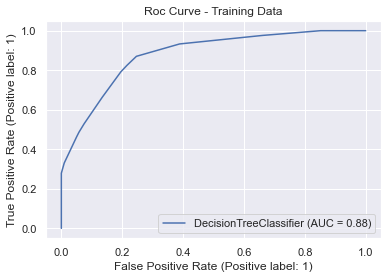

In [34]:
plot_roc_curve(estimator=reg_dt_model,X=X_train, y=y_train)
plt.title('Roc Curve - Training Data');

AUC: 0.879


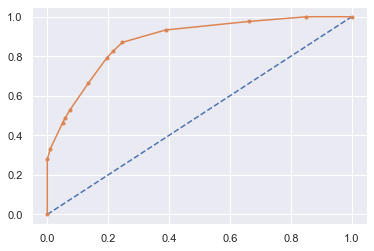

In [35]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### AUC and ROC for the test data

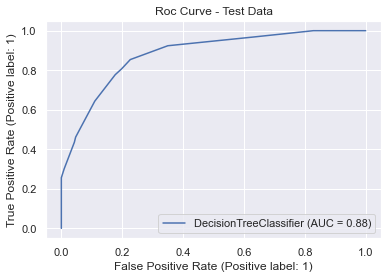

In [36]:
plot_roc_curve(estimator=reg_dt_model,X=X_test, y=y_test)
plt.title('Roc Curve - Test Data');

AUC: 0.881


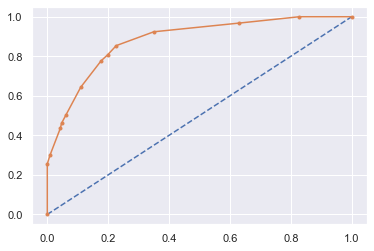

In [37]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## Confusion Matrix for the training data Predictions

In [38]:
from sklearn.metrics import classification_report,plot_confusion_matrix, confusion_matrix

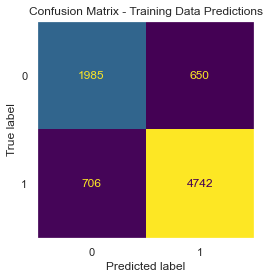

In [39]:
plot_confusion_matrix(reg_dt_model,X_train,y_train,colorbar=False)
plt.title('Confusion Matrix - Training Data Predictions')
plt.grid();

In [40]:
confusion_matrix(y_train, ytrain_predict) # alternate output. Not very good 

array([[1985,  650],
       [ 706, 4742]], dtype=int64)

In [41]:
#Train Data Accuracy
reg_dt_model.score(X_train,y_train)

0.832240504763083

In [42]:
print((1985+4742)/(1985+650+706+4742))

0.832240504763083


In [43]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75      2635
           1       0.88      0.87      0.87      5448

    accuracy                           0.83      8083
   macro avg       0.81      0.81      0.81      8083
weighted avg       0.83      0.83      0.83      8083



## Confusion Matrix for test data

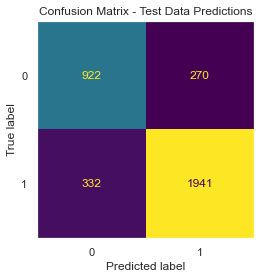

In [44]:
plot_confusion_matrix(reg_dt_model,X_test,y_test,colorbar=False)
plt.title('Confusion Matrix - Test Data Predictions')
plt.grid();

In [45]:
#Test Data Accuracy
reg_dt_model.score(X_test,y_test)

0.8262626262626263

In [46]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75      1192
           1       0.88      0.85      0.87      2273

    accuracy                           0.83      3465
   macro avg       0.81      0.81      0.81      3465
weighted avg       0.83      0.83      0.83      3465



# Conclusion

Accuracy on the Training Data: 83%  
Accuracy on the Test Data: 82%

AUC on the Training Data: 87.9%  
AUC on the Test: 88.1%

Accuracy, AUC, Precision and Recall for test data is almost inline with training data.  
This proves no overfitting or underfitting has happened, and overall the model is a good model for classification

FICO, term and gender (in that sequence) are the most important variables in determining if a borrower will get into a delinquent stage 

<p style = "color:gold;font-weight:bold;font-size:40px;"> Happy Learning !! </p>

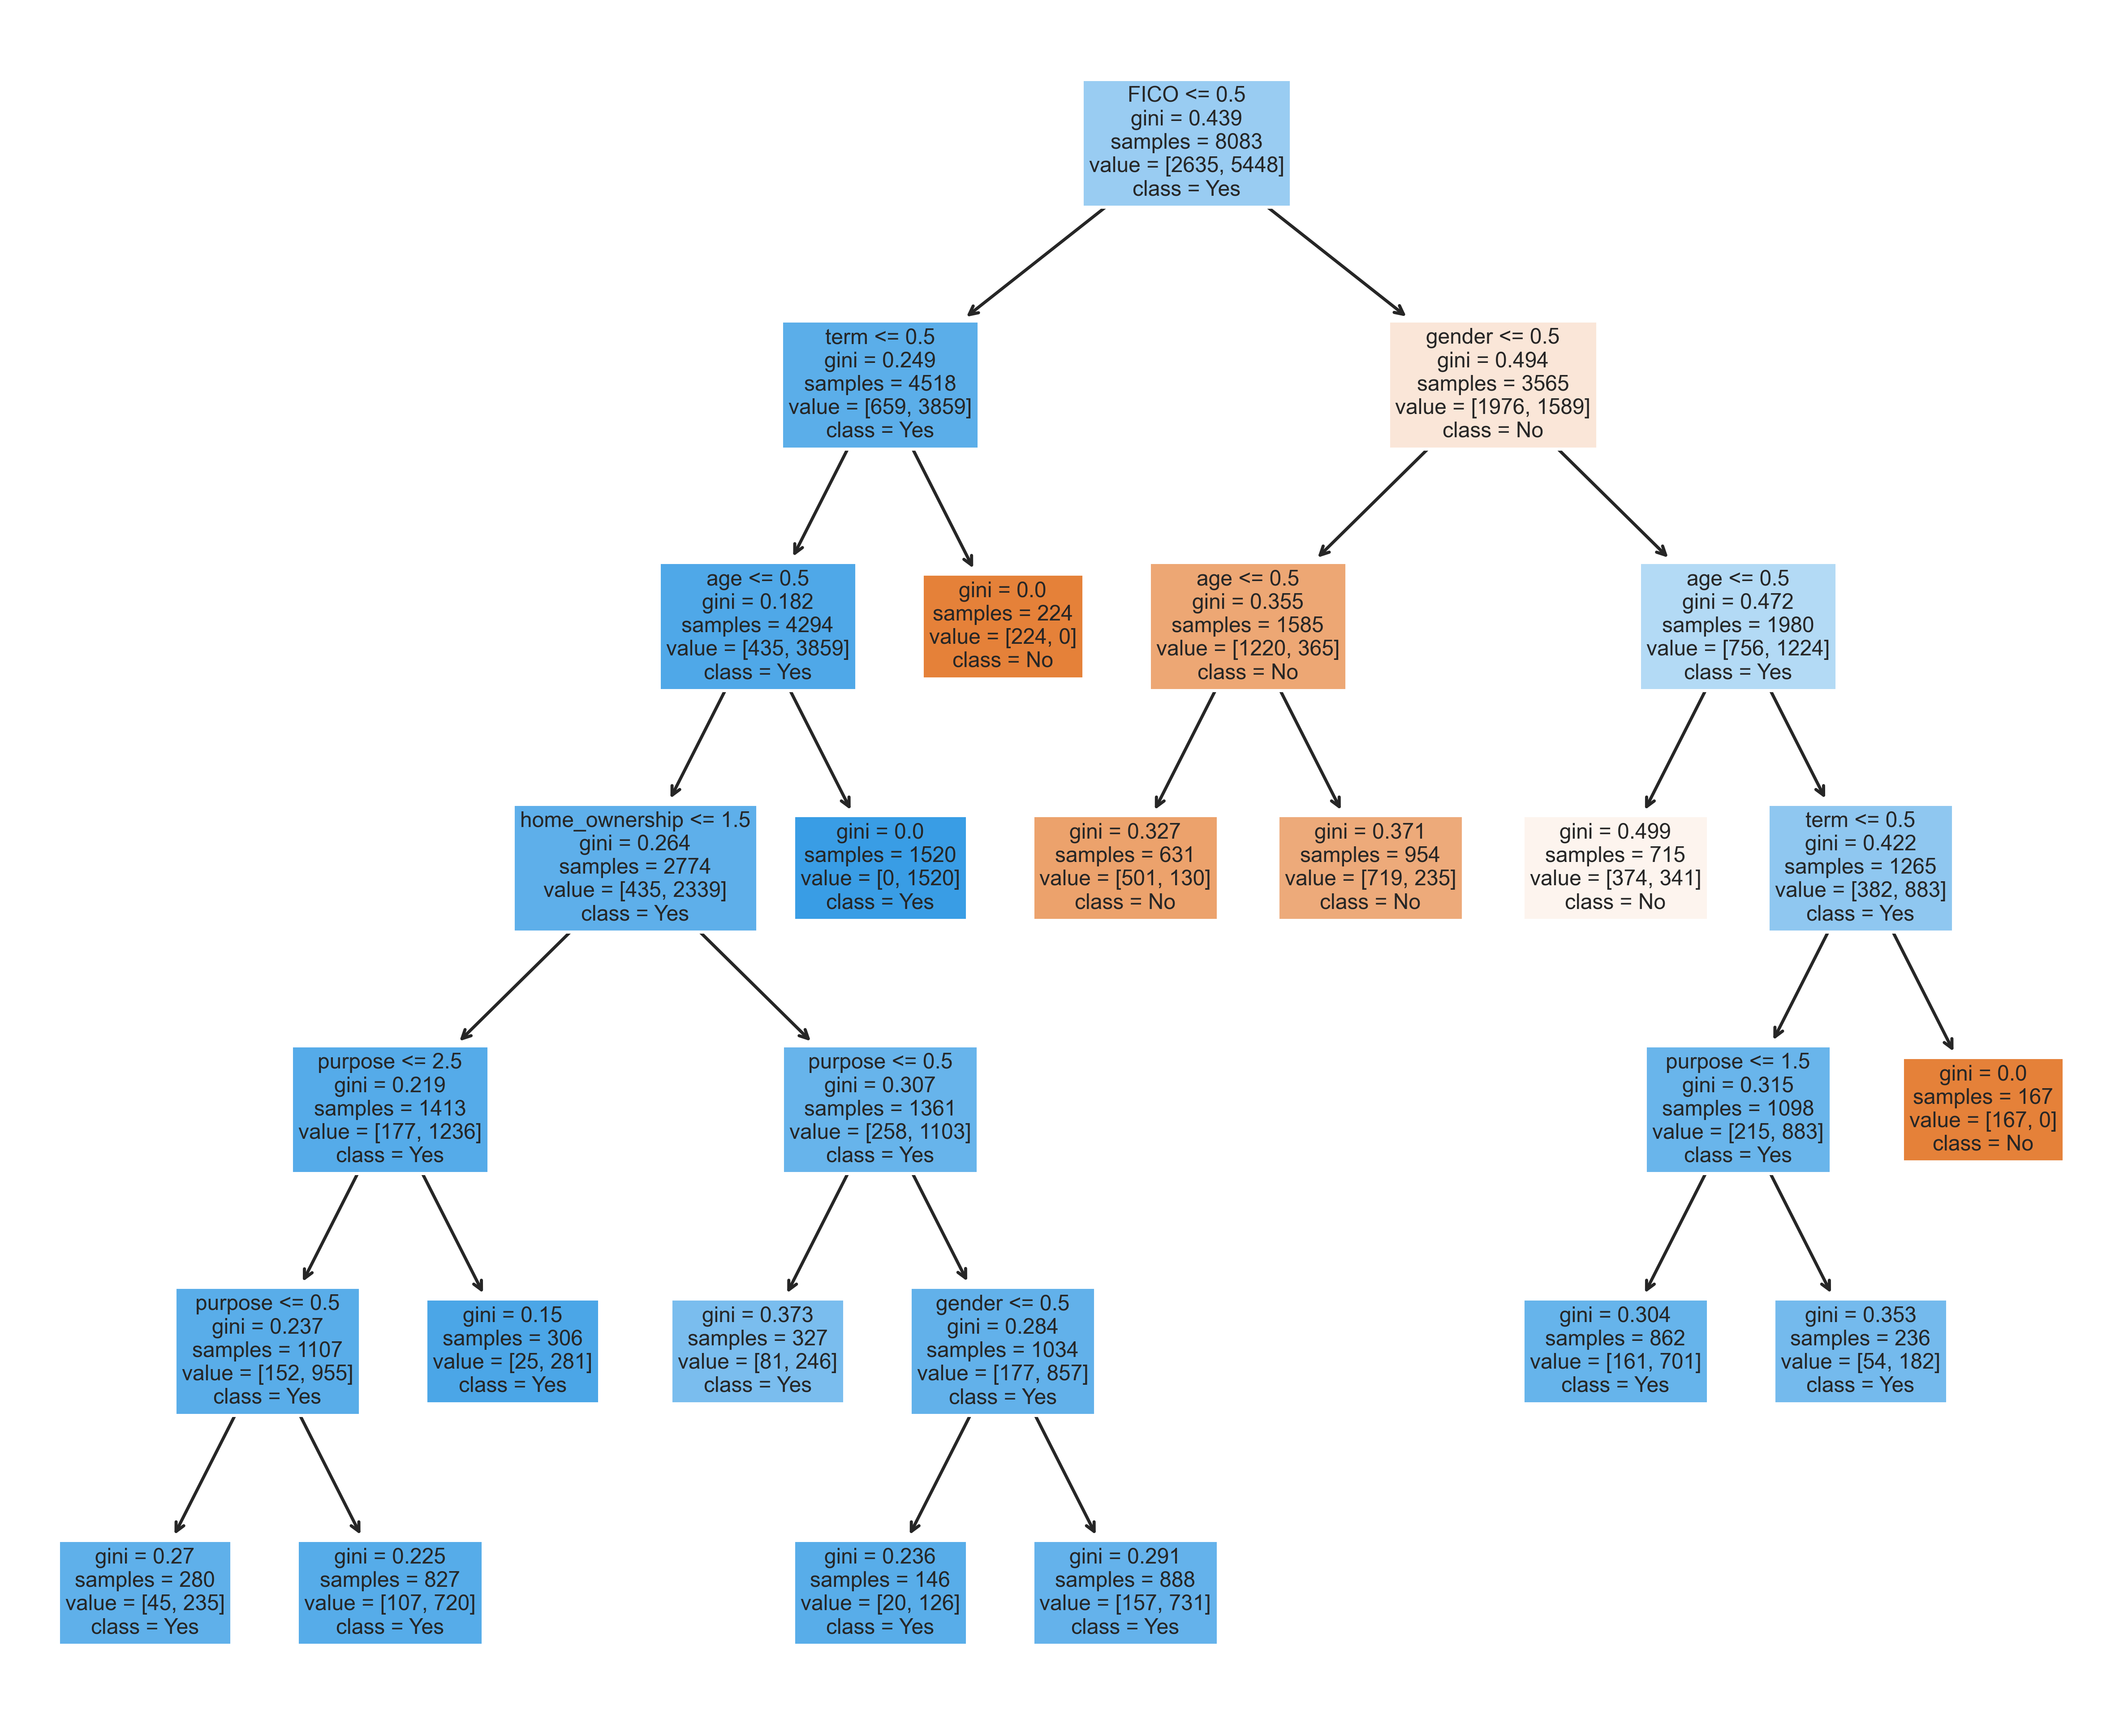

In [47]:
plt.figure(figsize=(12,10), dpi=500)
tree.plot_tree(reg_dt_model,
              feature_names=list(X_train),
              class_names=list(train_char_label),
              filled=True);